In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
#from labellines import labelLine, labelLines
import seaborn as sns
import os

In [2]:
eosdir_pos = '/eos/uscms/store/user/jennetd/smart-pixels/dataset8/unflipped-positive/'
eosdir_neg = '/eos/uscms/store/user/jennetd/smart-pixels/dataset8/unflipped-negative/'

In [3]:
truth = pd.DataFrame()

for f in os.listdir(eosdir_pos):
    if 'recon' in f:
        continue
    truth = pd.concat([truth,pd.read_csv(eosdir_pos+f),])
    
for f in os.listdir(eosdir_neg):
    if 'recon' in f:
        continue
    truth = pd.concat([truth,pd.read_csv(eosdir_neg+f),])
    

In [4]:
truth.head()

,x-entry,y-entry,z-entry,n_x,n_y,n_z,number_eh_pairs,y-local,pt,cotAlpha,cotBeta,y-midplane,x-midplane
0,12.063666,30.923424,100.0,0.768970,-0.160933,-0.634940,10034.0,-6.94104,0.656019,-1.211091,0.253462,18.250337,72.618207
1,67.455246,4.533963,100.0,-1.205132,-0.087774,-0.635886,15383.0,-4.33669,0.637776,1.895201,0.138034,-2.367746,-27.304821
2,-225.239441,13.836857,100.0,1.451834,-0.039285,-0.467361,26680.0,-2.67448,0.468860,-3.106451,0.084057,9.634003,-69.916896
3,-2.914946,11.285143,100.0,-0.110369,-0.034764,-0.554253,8183.0,-2.11685,0.555289,0.199131,0.062722,8.149030,-12.871500
4,286.367920,-9.845788,100.0,-3.201757,-0.015797,-0.738721,27677.0,-0.96378,0.740845,4.334190,0.021384,-10.915001,69.658432


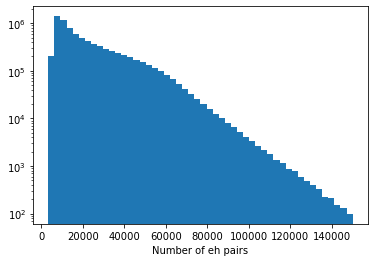

In [5]:
plt.hist(truth['number_eh_pairs'],bins=50);
plt.xlabel('Number of eh pairs')
plt.yscale('log')

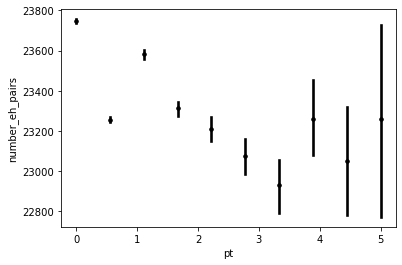

In [6]:
x = sns.regplot(x=truth['pt'], y=truth['number_eh_pairs'], x_bins=np.linspace(0,5,10), fit_reg=None, marker='.', ci=68, color='black')

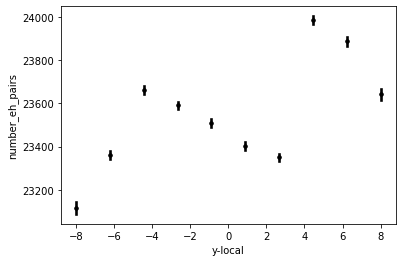

In [7]:
x = sns.regplot(x=truth['y-local'], y=truth['number_eh_pairs'], x_bins=np.linspace(-8,8,10), fit_reg=None, marker='.', ci=68, color='black')

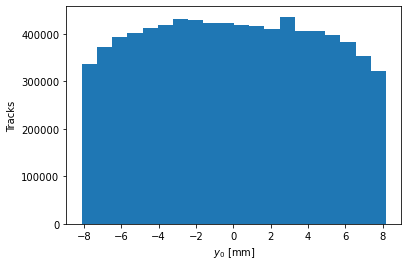

In [8]:
plt.hist(truth['y-local'],bins=20,histtype='stepfilled');
plt.xlabel(r'$y_0$ [mm]')
plt.ylabel('Tracks')
plt.savefig('dataset678/ylocal.pdf',bbox_inches='tight')

(1000, 2000000)

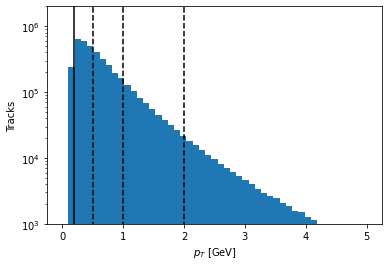

In [9]:
plt.hist(truth['pt'],bins=np.linspace(0,5,50),histtype='stepfilled');
plt.xlabel(r'$p_T$ [GeV]')
plt.ylabel('Tracks')
plt.yscale('Log')
plt.plot([0.2,0.2],[0,5000000],color='black')
plt.plot([0.5,0.5],[0,5000000],color='black',linestyle='--')
plt.plot([1,1],[0,5000000],color='black',linestyle='--')
plt.plot([2,2],[0,5000000],color='black',linestyle='--')
plt.ylim(1000,2000000)

#plt.savefig('dataset678/pT.pdf',bbox_inches='tight')

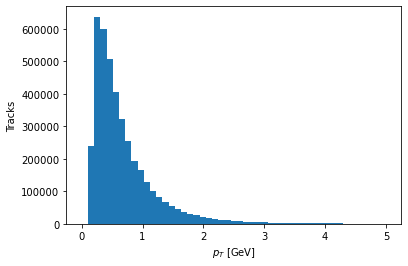

In [11]:
plt.hist(truth['pt'],bins=np.linspace(0,5,50),histtype='stepfilled');
plt.xlabel(r'$p_T$ [GeV]')
plt.ylabel('Tracks')

plt.savefig('dataset678/pT.pdf',bbox_inches='tight')

In [ ]:
plt.hist(truth['cotBeta'],bins=50,histtype='stepfilled');
plt.xlabel(r'$\cot\beta$')
plt.ylabel('Tracks')
plt.savefig('dataset678/cotBeta.pdf',bbox_inches='tight')

In [ ]:
plt.hist(truth['cotAlpha'],bins=50,histtype='stepfilled');
plt.xlabel(r'$\cot\alpha$')
plt.ylabel('Tracks')
plt.savefig('dataset678/cotAlpha.pdf',bbox_inches='tight')

In [ ]:
plt.hist(truth['x-midplane'],bins=50);

In [ ]:
plt.hist(truth['y-midplane'],bins=50);

In [ ]:
plt.hist(truth['n_x'],bins=50);
plt.xlabel(r'Particle origin $z$ [mm]')

In [ ]:
plt.hist(truth['n_y'],bins=50);

In [ ]:
B = 3.8*(3*10**8) # eV/m
R = 0.029 # meters

def deltaPhi(pT,q):
    pT = pT*10**9 # eV
    return np.arcsin(q*R*B/(2*pT))

def cotBeta(pT,q,yloc):
    return 1./np.tan(np.pi/2 - deltaPhi(pT,q) - np.arctan(yloc/R))

def pT(cotBeta,q,yloc):
    dPhi = 1*np.arctan(1./cotBeta) - np.pi/2 + np.arctan(yloc/R)
    return q*R*B/(2*np.sin(dPhi))/(10**9) # eV

# Sanity check
pt = 4
pT(cotBeta(pt,1,.01),1,.01)

In [ ]:
xmin = 0.2
xmax = 3

x = np.linspace(xmin,xmax,100)
y = np.linspace(-0.5,0.5,100)

fig, ax = plt.subplots(1,1)

plt.hist2d(truth['pt'],truth['cotBeta'],bins=[x,y],norm = matplotlib.colors.LogNorm());

y1 = cotBeta(x,1,0)
plt.plot(x,y1,label=r'center',color='red')

y2 = cotBeta(x,1,0.008)
plt.plot(x,y2,label=r'left edge',color='red')

y3 = cotBeta(x,1,-0.008)
plt.plot(x,y3,label=r'right edge',color='red')

xvals = [4, 5, 4]

labelLines(ax.get_lines(), align=False, xvals=xvals, yoffsets=0.05, backgroundcolor="none")

plt.xlabel(r'$p_T$ [GeV]')
plt.ylabel(r'$\cot \beta$')
plt.savefig('dataset678/pTcotBeta.pdf')

In [ ]:
def deltaZ(theta,R):
    return R/np.tan(theta)

def Eta(theta):
    return -np.log(np.tan(theta/2))

def Theta(eta):
    return 2*np.arctan(np.exp(-1*eta))

In [ ]:
def pix_grid():
    for i in range(0,22):
        x = 50*i-525
        plt.plot([x,x],[-100,100],color='lightgray',linewidth=0.5)
        
    for i in range(0,14):
        y = 12.5*i-81.25
        plt.plot([-550,550],[y,y],color='lightgray',linewidth=0.5)
    

In [ ]:
plt.hist2d(x=truth['x-entry'],y=truth['y-entry'],bins=[np.linspace(-525,525,50),np.linspace(-81.25,81.25,50)]);
plt.xlabel(r'x entry [$\mu$m]')
plt.ylabel(r'y entry [$\mu$m]')
pix_grid()
#plt.xlim(-525,525)
#plt.ylim(-81.25,81.25)

plt.savefig('dataset678/xy.pdf')

In [ ]:
plt.hist2d(x=truth['x-midplane'],y=truth['y-midplane'],bins=[np.linspace(-525,525,50),np.linspace(-81.25,81.25,150)]);
plt.xlabel(r'x [$\mu$m]')
plt.ylabel(r'y [$\mu$m]')
pix_grid()
#plt.xlim(-525,525)
#plt.ylim(-81.25,81.25)

plt.savefig('dataset678/xy.pdf')

In [ ]:
plt.hist2d(x=truth['pt'],y=truth['cotAlpha'],bins=50);

In [ ]:
plt.hist2d(x=truth['pt'],y=truth['number_eh_pairs'],bins=50,norm = matplotlib.colors.LogNorm());

In [ ]:
def charge_per_path(Q,cota,cotb):
    return Q/np.sqrt(1+cota*cota+cotb*cotb)

truth['charge_per_path'] = charge_per_path(truth['number_eh_pairs'],truth['cotAlpha'],truth['cotBeta'])


In [ ]:
plt.hist(truth['charge_per_path'],bins=50)
plt.xlabel('Charge per unit path length [eh/ ?]')
plt.yscale('log')

In [ ]:
plt.hist2d(x=truth['pt'],y=truth['charge_per_path'],bins=[200,50],norm = matplotlib.colors.LogNorm());
plt.xlabel(r'$p_T$ [GeV]')
plt.xlim(0,1)

In [ ]:
plt.hist2d(x=truth['y-local'],y=truth['charge_per_path'],bins=50,norm = matplotlib.colors.LogNorm());

In [ ]:
plt.hist2d(x=truth['cotBeta'],y=truth['number_eh_pairs'],bins=50);

In [ ]:
x = sns.regplot(x=truth['cotBeta'], y=truth['number_eh_pairs'], x_bins=50, fit_reg=None, marker='.', x_ci=68, color='black')
#plt.xlabel(r'True $\cot \beta$')
#plt.ylabel(r'True - Pred $\cot \beta$')

In [ ]:
plt.hist2d(x=truth['cotAlpha'],y=truth['number_eh_pairs'],bins=50);

In [ ]:
x = sns.regplot(x=truth['cotAlpha'], y=truth['number_eh_pairs'], x_bins=50, fit_reg=None, marker='.', ci=68, color='black')
#plt.xlabel(r'True $\cot \beta$')
#plt.ylabel(r'True - Pred $\cot \beta$')

In [ ]:
plt.hist2d(x=truth['y-local'],y=truth['number_eh_pairs'],bins=50);

In [ ]:
def fraction(threshold):
    return len(truth[abs(truth['pt'])<threshold])/len(truth)

In [ ]:
fraction(0.2)

In [ ]:
fraction(0.5)

In [ ]:
fraction(1)

In [ ]:
fraction(2)